# Problem Statement
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
cmpny=pd.read_csv("Company_Data.csv")
cmpny

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
cmpny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
cmpny.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
cmpny.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

In [6]:
print(cmpny["ShelveLoc"].unique())
print(cmpny["Urban"].unique())
print(cmpny["US"].unique())

['Bad' 'Good' 'Medium']
['Yes' 'No']
['Yes' 'No']


In [7]:
cmpny.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
#Label Encoding

In [9]:
label_encoder = LabelEncoder()
cmpny['ShelveLoc']= label_encoder.fit_transform(cmpny['ShelveLoc']) 
cmpny['Urban']= label_encoder.fit_transform(cmpny['Urban'])
cmpny['US']= label_encoder.fit_transform(cmpny['US'])

In [10]:
cmpny['Sales'].mean()

7.496325

In [11]:
cmpny['High']=cmpny.Sales.map(lambda x: 1 if x >7.49 else 0)

In [12]:
cmpny.drop('Sales',inplace=True,axis=1)
cmpny.rename(columns={'High':'Sales'},inplace=True)
cmpny.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [13]:
cmpny.dtypes

CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
Sales          int64
dtype: object

In [14]:
list(cmpny.columns)

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'Sales']

In [15]:
cmpny['ShelveLoc'].value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [16]:
cmpny['Urban'].value_counts()

1    282
0    118
Name: Urban, dtype: int64

In [17]:
cmpny['US'].value_counts()

1    258
0    142
Name: US, dtype: int64

In [18]:
cmpny.groupby(['ShelveLoc','Urban','US']).count()

CompPrice  Income  Advertising  Population  Price  Age  \
ShelveLoc Urban US                                                           
0         0     0          11      11           11          11     11   11   
                1          11      11           11          11     11   11   
          1     0          23      23           23          23     23   23   
                1          51      51           51          51     51   51   
1         0     0           6       6            6           6      6    6   
                1          22      22           22          22     22   22   
          1     0          18      18           18          18     18   18   
                1          39      39           39          39     39   39   
2         0     0          29      29           29          29     29   29   
                1          39      39           39          39     39   39   
          1     0          55      55           55          55     55   55   
                1          96      96           96          96     96   96   

                    Education  Sales  
ShelveLoc Urban US                    
0         0     0          11     11  
                1          11     11  
          1     0          23     23  
                1          51     51  
1         0     0           6      6  
                1          22     22  
          1     0          18     18  
                1          39     39  
2         0     0          29     29  
                1          39     39  
          1     0          55     55  
                1          96     96

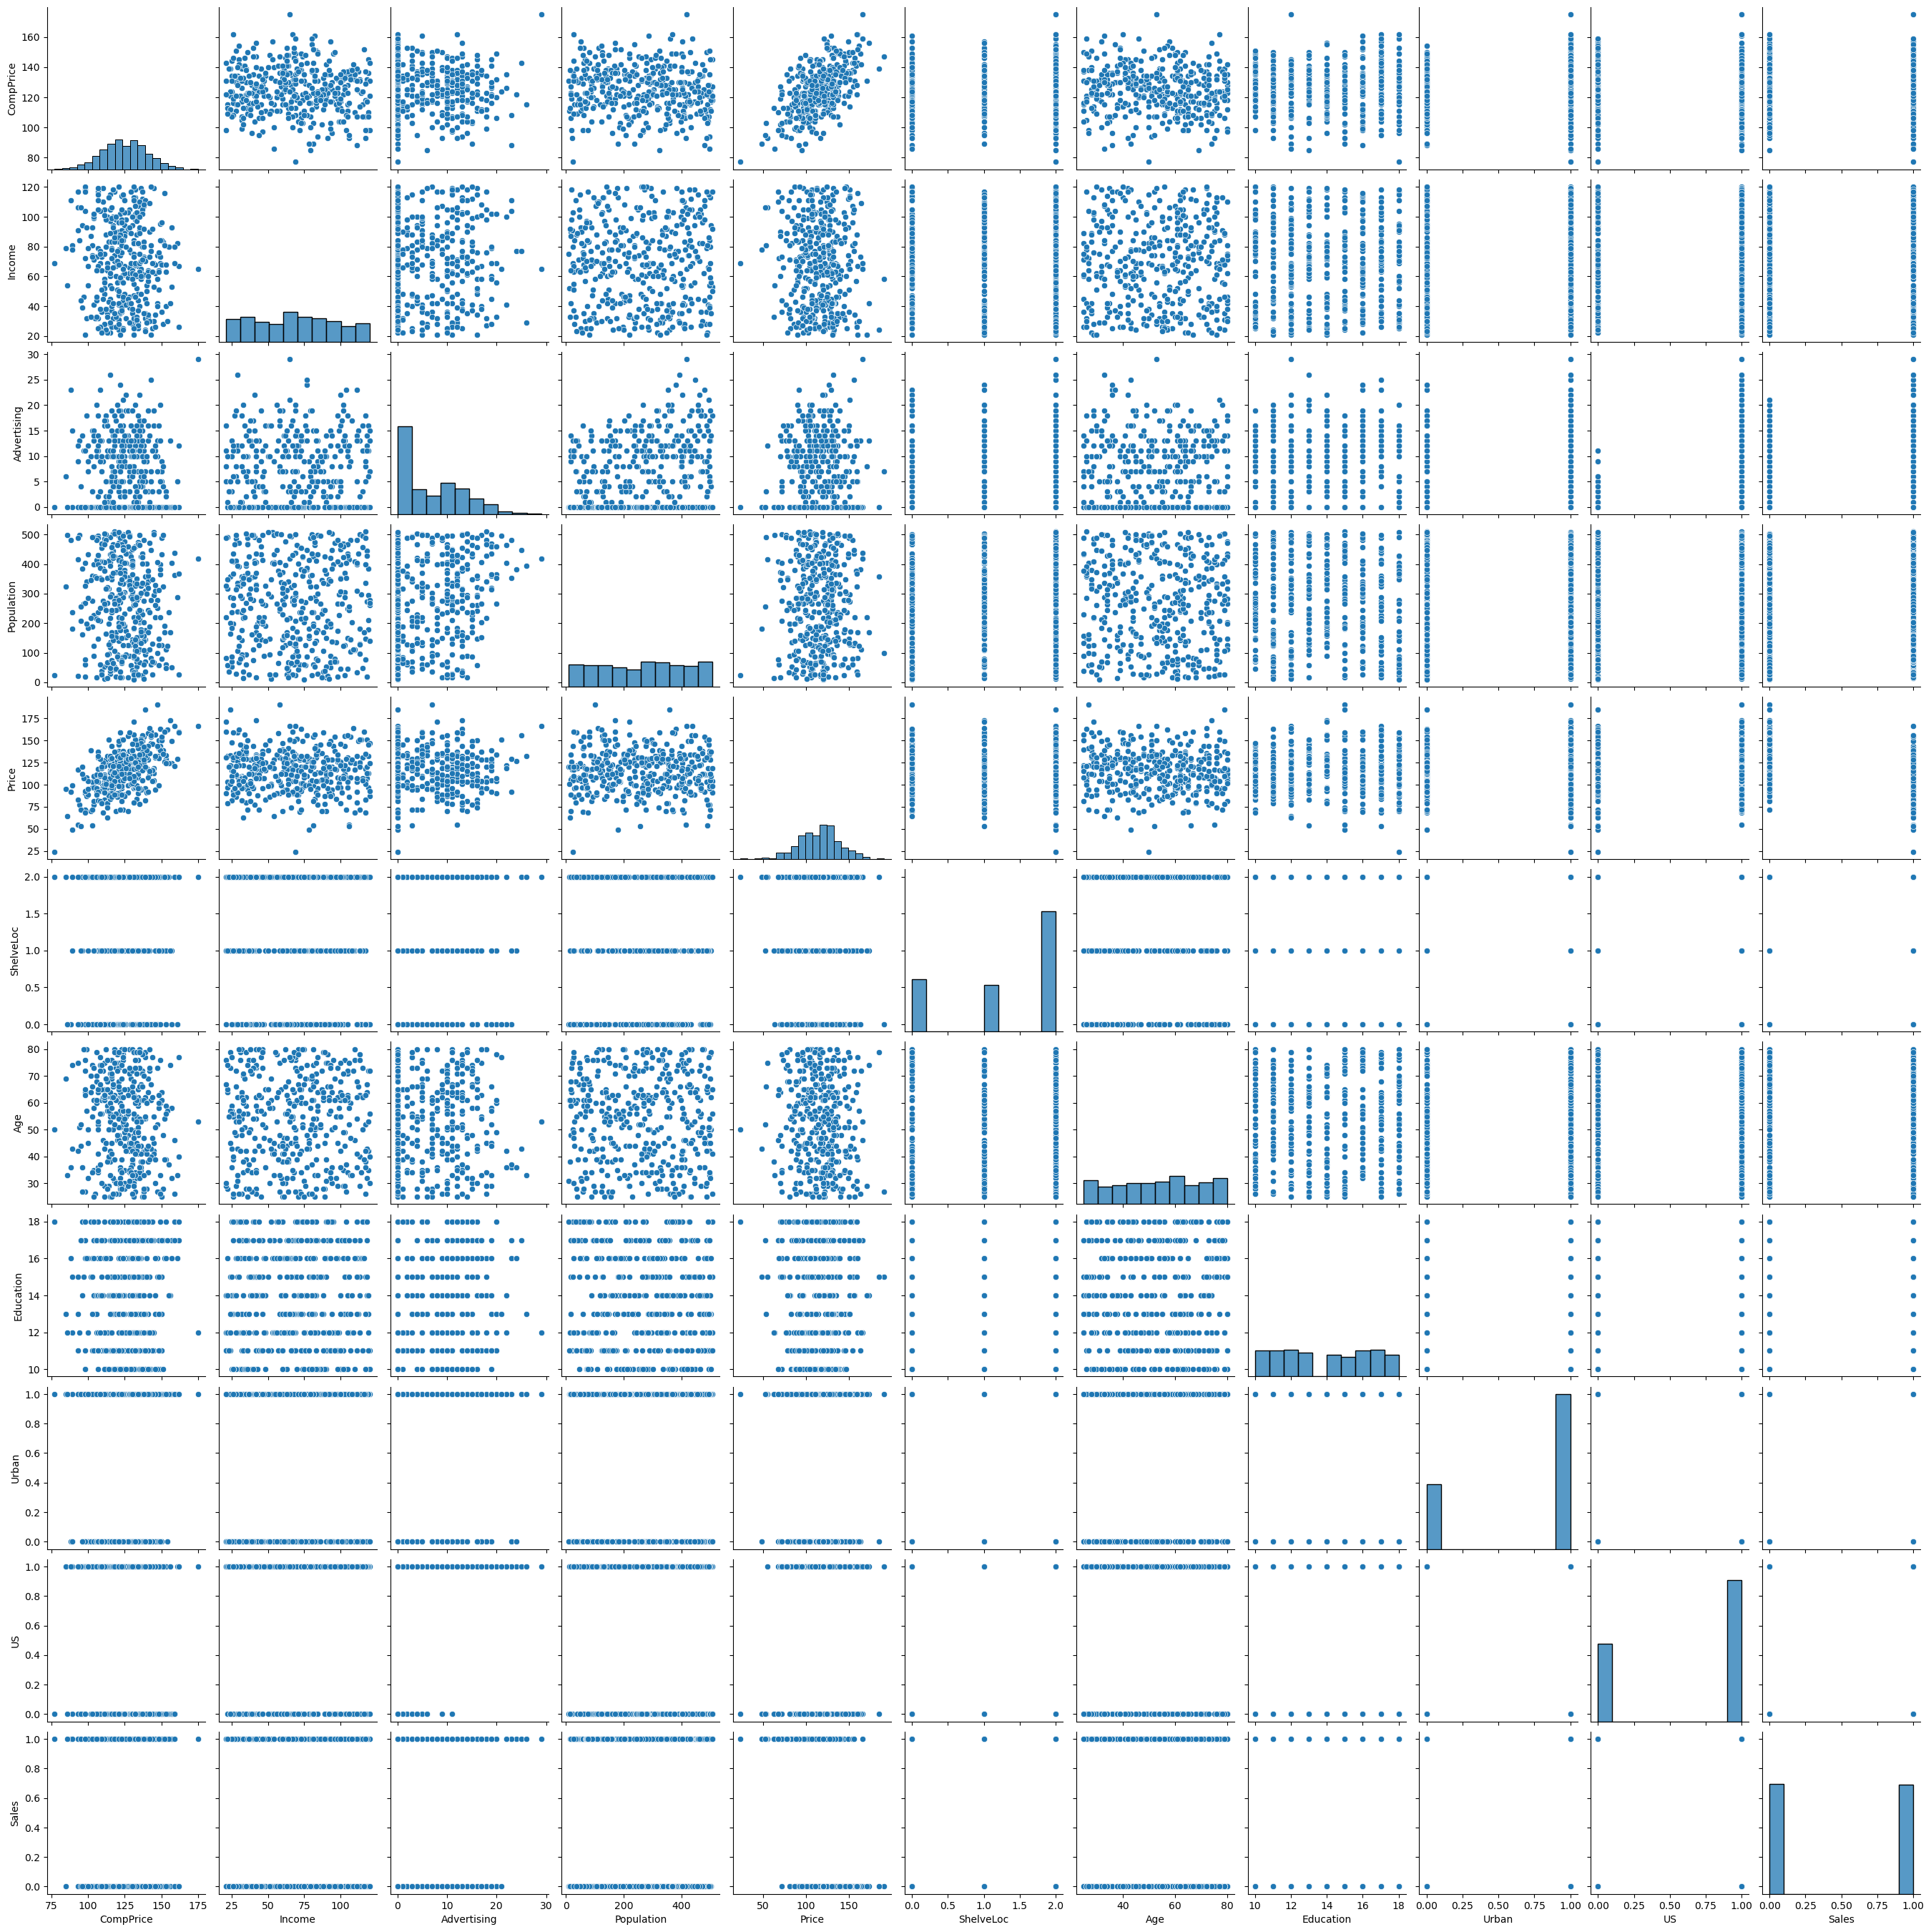

In [19]:
sns.pairplot(cmpny)

In [20]:
cmpny.corr()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869,0.035578
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601,0.123460
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460,0.251910
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564,0.069327
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861,-0.392275
ShelveLoc,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760,0.106962
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652,-0.186707
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250,-0.028847
Urban,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085,-0.047090
US,0.016869,0.089601,0.684460,0.060564,0.057861,-0.039760,0.008652,-0.078250,0.047085,1.000000,0.142579


<AxesSubplot:>

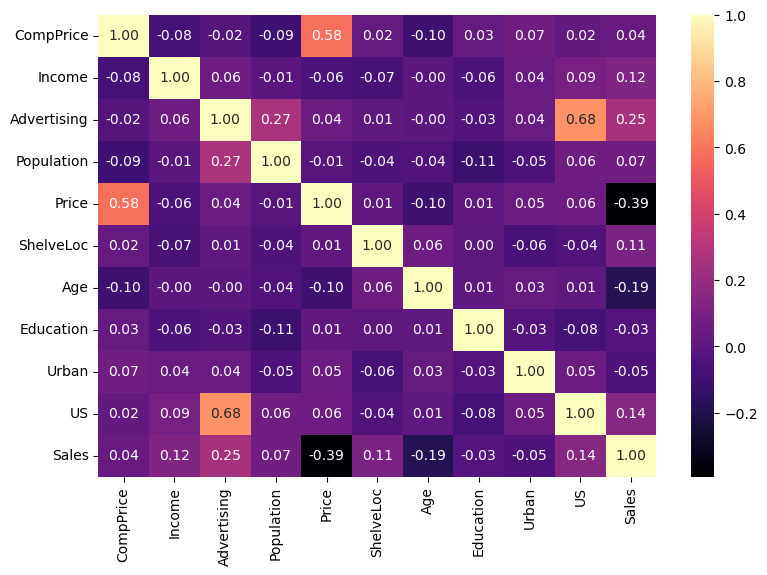

In [21]:
plt.figure(figsize = (9,6));
sns.heatmap(cmpny.corr(), cmap='magma', annot=True, fmt=".2f")

<AxesSubplot:>

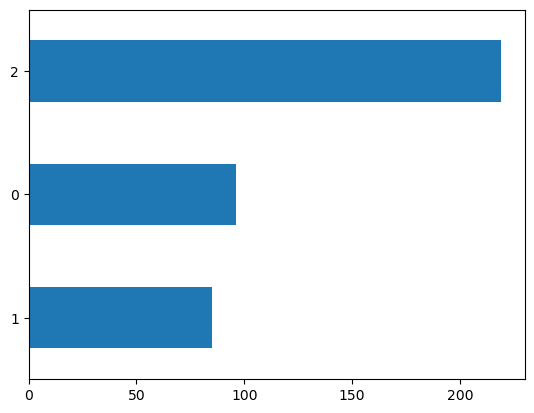

In [22]:
cmpny["ShelveLoc"].value_counts(ascending=True).plot(kind='barh')

In [23]:
x = cmpny.iloc[:,:-1]
y = cmpny['Sales']

In [24]:
y.head(10)

0    1
1    1
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Sales, dtype: int64

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=21)
xtrain

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
145,144,63,11,27,117,2,47,17,1,1
216,141,33,0,243,144,2,34,17,1,0
377,132,61,0,263,125,2,41,12,0,0
176,138,107,9,480,154,2,47,11,0,1
91,97,46,11,267,107,2,80,15,1,1
...,...,...,...,...,...,...,...,...,...,...
368,109,22,10,348,79,1,74,14,0,1
48,116,52,0,349,98,0,69,18,1,0
260,129,117,8,400,101,0,36,10,1,1
312,137,117,5,337,135,0,38,10,1,1


In [26]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(300, 10) (100, 10) (300,) (100,)


In [27]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [28]:
ypred=model.predict(xtest)
from sklearn.metrics import roc_curve,auc
FPR,TPR,thresholds =roc_curve(ytest,ypred)
roc_auc=auc(FPR,TPR)
roc_auc

0.7676518883415435

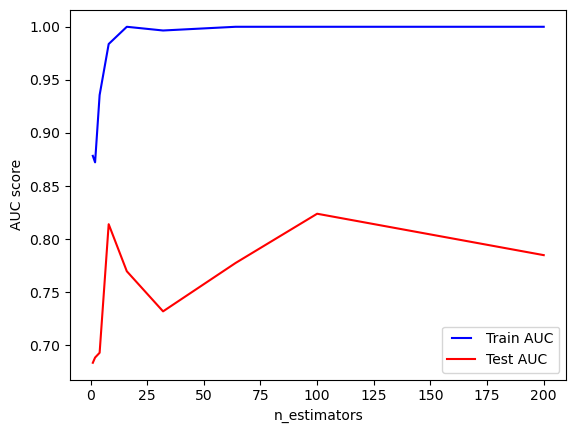

In [29]:
n_estimators=[1,2,4,8,16,32,64,100,200]
train_result=[]
test_result=[]

for estimator in n_estimators:
    model = RandomForestClassifier(n_estimators=estimator,n_jobs=-1)
    model.fit(xtrain,ytrain)
    train_pred=model.predict(xtrain)
    FPR,TPR,thresolds=roc_curve(ytrain,train_pred)
    roc_auc= auc(FPR,TPR)
    train_result.append(roc_auc)
    test_pred=model.predict(xtest)
    FPR,TPR,thresolds=roc_curve(ytest,test_pred)
    roc_auc=auc(FPR,TPR)
    test_result.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1,=plt.plot(n_estimators,train_result,'b',label='Train AUC')
line2,=plt.plot(n_estimators,test_result,'r',label='Test AUC')
plt.legend(handler_map={line1:HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [30]:
parameter={
 'criterion':['entropy','gini'],
    'n_estimators':[1,2,4,8,16,25,26,27,28,29,30,31,32],
    'max_depth':[1,2,3,4,5,6,7],
    
}

In [31]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid=parameter)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [1, 2, 4, 8, 16, 25, 26, 27, 28, 29,
                                          30, 31, 32]})

In [32]:
ypred=grid.predict(xtest)
grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 32}

In [33]:
model=RandomForestClassifier(criterion='entropy',n_estimators=27,random_state=14,max_depth=6)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        58
           1       0.83      0.81      0.82        42

    accuracy                           0.85       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.85      0.85      0.85       100



In [34]:
print("Training Accuracy:", model.score(xtrain,ytrain))
print("Testing Accuracy:" ,model.score(xtest,ytest))

Training Accuracy: 0.9666666666666667
Testing Accuracy: 0.85


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [36]:
print("training r-sq is: %.2f"% model.score(xtrain,ytrain))

training r-sq is: 0.97


In [37]:
ytrainpred=model.predict(xtrain)

In [38]:
print("The MAE is : %.2f"% mean_absolute_error(ytrain,ytrainpred))

The MAE is : 0.03


In [39]:
print("The MSE is : %.2f"% mean_squared_error(ytrain,ytrainpred))

The MSE is : 0.03


In [40]:
print("The RMSE is : %.2f"% np.sqrt(mean_squared_error(ytrain,ytrainpred)))

The RMSE is : 0.18


In [41]:
print("The EVS is : %.2f"% explained_variance_score(ytrain,ytrainpred))

The EVS is : 0.87


In [42]:
ytestpred=model.predict(xtest)
print(ytestpred[:10])

[0 0 0 0 0 0 1 0 1 0]


In [43]:
print("The testing r-sq is : %.2f"% r2_score(ytest,ytestpred))

The testing r-sq is : 0.38


In [44]:
print("The MAE is : %.2f"% mean_absolute_error(ytest,ytestpred))

The MAE is : 0.15


In [45]:
print("The MSE is : %.2f"% mean_squared_error(ytest,ytestpred))

The MSE is : 0.15


In [46]:
print("The RMSE is : %.2f"% np.sqrt(mean_squared_error(ytest,ytestpred)))

The RMSE is : 0.39


In [47]:
print("The EVS is : %.2f"% explained_variance_score(ytest,ytestpred))

The EVS is : 0.38


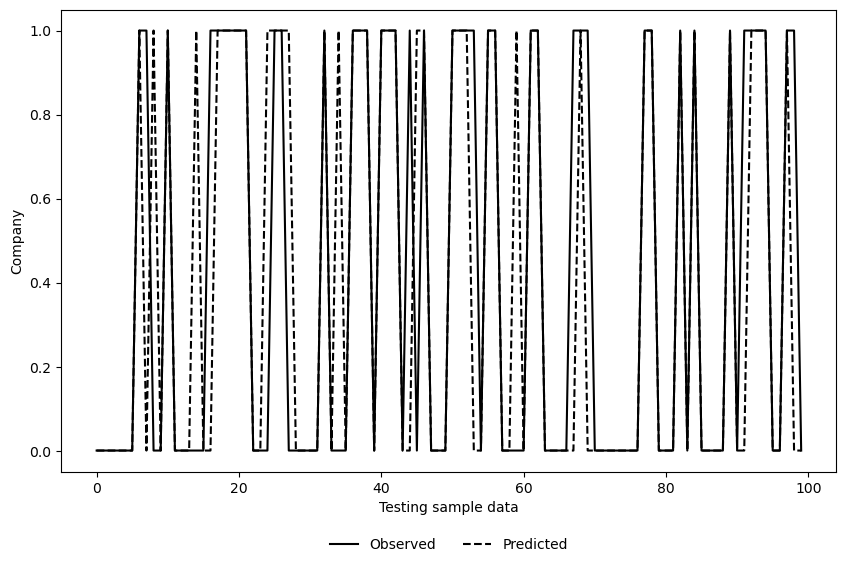

In [48]:
plt.rcParams["figure.figsize"]=(10,6)
x_ax=range(len(xtest))
# Plotting
plt.plot(x_ax,ytest,label="Observed", color= "k",linestyle= "-")
plt.plot(x_ax,ytestpred,label="Predicted",color="k",linestyle="--")
plt.ylabel("Company")
plt.xlabel("Testing sample data")
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center',ncol=2,frameon=False)
plt.show()

In [49]:
score_train=cross_val_score(model,xtrain,ytrain,scoring='neg_mean_squared_error',cv=10)
score_train

array([-0.13333333, -0.23333333, -0.1       , -0.06666667, -0.2       ,
       -0.36666667, -0.2       , -0.1       , -0.3       , -0.3       ])

In [50]:
from numpy import absolute
print(absolute(np.mean(score_train)))

0.2


In [51]:
score_test=cross_val_score(model,xtest,ytest,scoring='neg_mean_squared_error',cv=10)
score_test

array([-0.2, -0.4, -0.5, -0.5, -0.2, -0.2, -0.4, -0.1, -0.2, -0.4])

In [52]:
print(absolute(np.mean(score_test)))

0.31


In [53]:
from sklearn.pipeline import Pipeline
f_list=list(x.columns)
f_importance=pd.Series(model.feature_importances_ , index=f_list).sort_values(ascending=False)
print(f_importance)

Price          0.279909
ShelveLoc      0.136035
CompPrice      0.118806
Age            0.111898
Advertising    0.108336
Income         0.106378
Population     0.065539
Education      0.043920
Urban          0.021195
US             0.007984
dtype: float64


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings

warnings.filterwarnings('ignore')

In [55]:
fraudC = pd.read_csv(r"Fraud_check.csv")
fraudC

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [56]:
fraudC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [57]:
fraudC.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [58]:
fraudC.duplicated().value_counts()

False    600
dtype: int64

In [59]:
fraudC["Undergrad"].unique()

array(['NO', 'YES'], dtype=object)

In [60]:
fraudC["Urban"].unique()

array(['YES', 'NO'], dtype=object)

In [61]:
fraudC["Marital.Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [62]:
list(fraudC.columns)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [63]:
fraudC.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [64]:
y1=np.empty(600, dtype=object)
i=0

for value in fraudC['Taxable.Income']:
    if value<=30000:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1 
y1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [65]:
f_t=pd.DataFrame(y1,columns=["Target"])
f_t

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [66]:
fraudC=pd.concat([fraudC,f_t],axis=1)
fraudC

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [67]:
fraudC.drop('Taxable.Income',inplace=True,axis=1)
fraudC.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Target
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [68]:
fraudC['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [69]:
fraudC['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [70]:
fraudC['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [71]:
fraudC.groupby(['Urban', 'Target', 'Undergrad', 'Marital.Status']).count()

City.Population  Work.Experience
Urban Target Undergrad Marital.Status                                  
NO    Good   NO        Divorced                     43               43
                       Married                      37               37
                       Single                       34               34
             YES       Divorced                     41               41
                       Married                      37               37
                       Single                       45               45
      Risky  NO        Divorced                     10               10
                       Married                       7                7
                       Single                       12               12
             YES       Divorced                      9                9
                       Married                      13               13
                       Single                       10               10
YES   Good   NO        Divorced                     37               37
                       Married                      35               35
                       Single                       44               44
             YES       Divorced                     32               32
                       Married                      40               40
                       Single                       51               51
      Risky  NO        Divorced                      7                7
                       Married                      12               12
                       Single                       10               10
             YES       Divorced                     10               10
                       Married                      13               13
                       Single                       11               11

In [72]:
fraudC['Target'].value_counts()

Good     476
Risky    124
Name: Target, dtype: int64

In [73]:
en = LabelEncoder()
fraudC['Undergrad']= en.fit_transform(fraudC['Undergrad'])
fraudC['Marital.Status']= en.fit_transform(fraudC['Marital.Status'])
fraudC['Urban']= en.fit_transform(fraudC['Urban'])
fraudC['Target']= en.fit_transform(fraudC['Target'])

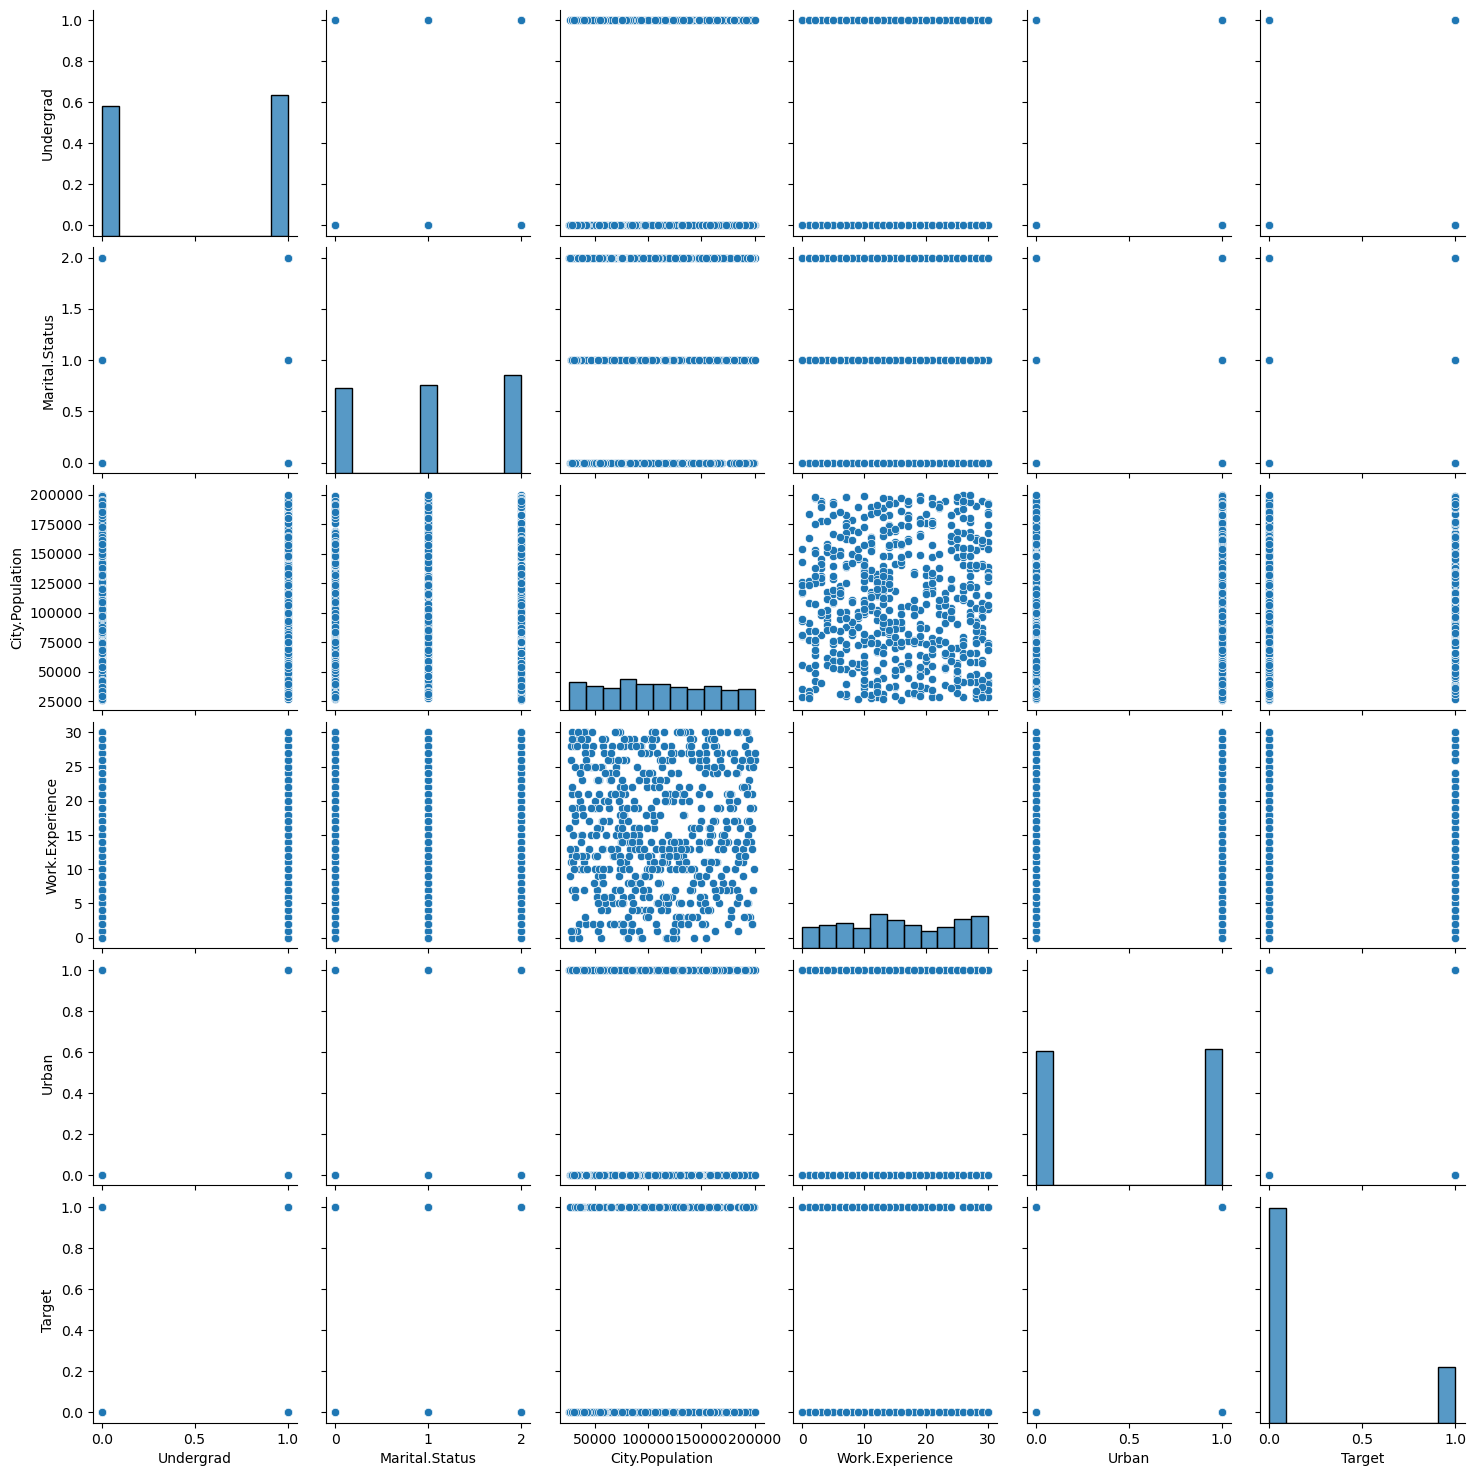

In [74]:
sns.pairplot(fraudC)

<AxesSubplot:>

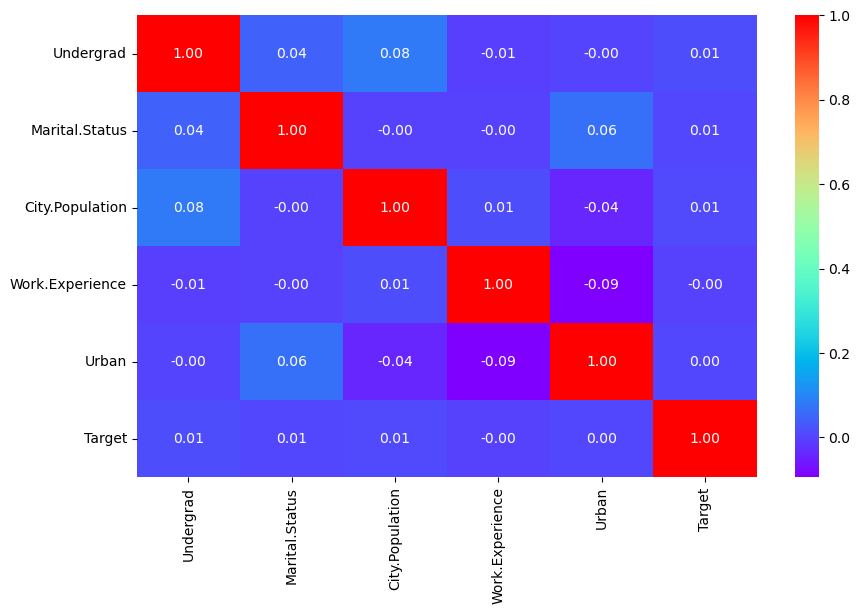

In [75]:
sns.heatmap(fraudC.corr(), cmap='rainbow', annot=True, fmt=".2f")

<AxesSubplot:xlabel='City.Population', ylabel='Density'>

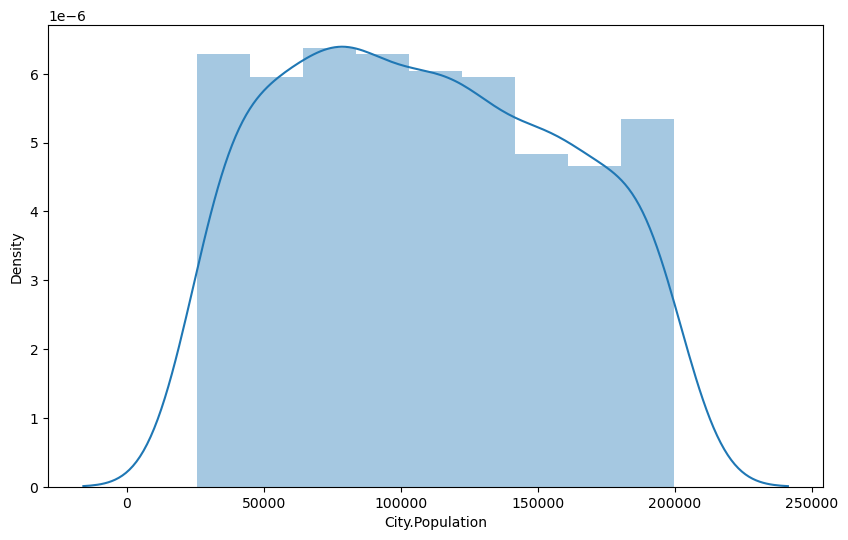

In [76]:
sns.distplot(fraudC['City.Population'])

<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

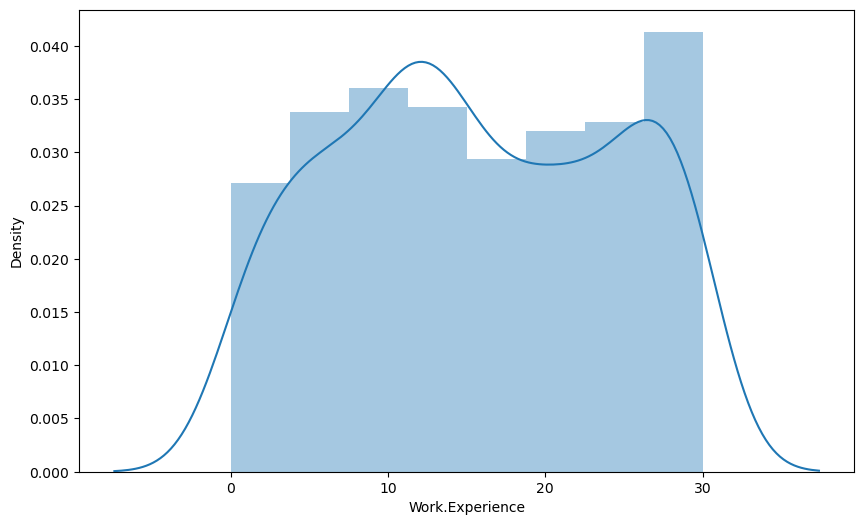

In [77]:
sns.distplot(fraudC['Work.Experience'])

<AxesSubplot:xlabel='City.Population', ylabel='Work.Experience'>

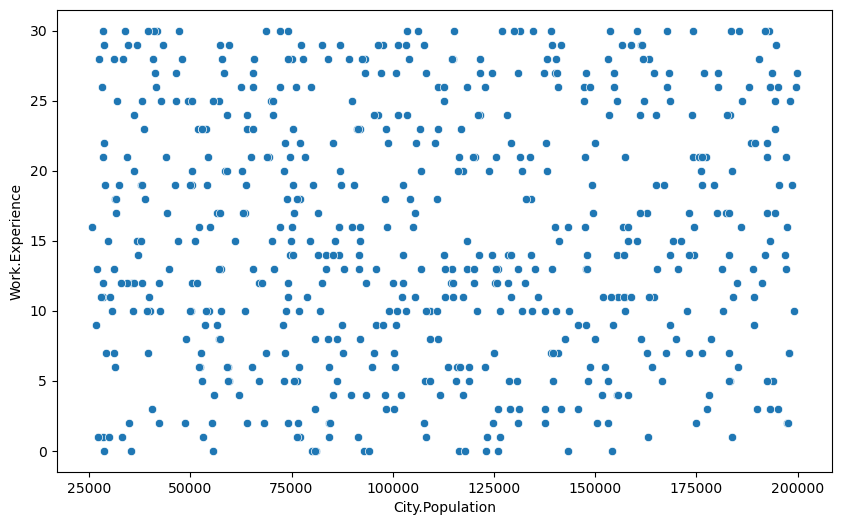

In [78]:
sns.scatterplot(x = 'City.Population', y = 'Work.Experience', data = fraudC)

In [79]:
x=fraudC.iloc[:,0:5]
y=fraudC['Target']
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [80]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=1)
#Individual Models

lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150



In [81]:
print(lg.score(xtrain,ytrain))
print(lg.score(xtest,ytest))

0.7933333333333333
0.7933333333333333


In [82]:
def predict(model):
    model = model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(classification_report(ytest,ypred))
    print(model.score(xtrain,ytrain))
    print(model.score(xtest,ytest))

In [83]:
predict(LogisticRegression())

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150

0.7933333333333333
0.7933333333333333


In [84]:
predict(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       119
           1       0.21      0.26      0.23        31

    accuracy                           0.65       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.67      0.65      0.66       150

1.0
0.6466666666666666


In [85]:
#BaggingClassifier

In [86]:
predict(BaggingClassifier(DecisionTreeClassifier()))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       119
           1       0.17      0.06      0.09        31

    accuracy                           0.74       150
   macro avg       0.48      0.49      0.47       150
weighted avg       0.66      0.74      0.69       150

0.9755555555555555
0.74


In [87]:
predict(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       119
           1       0.00      0.00      0.00        31

    accuracy                           0.74       150
   macro avg       0.39      0.47      0.43       150
weighted avg       0.62      0.74      0.67       150

1.0
0.74


In [88]:
from sklearn.metrics import roc_curve,auc
FPR,TPR,thresholds =roc_curve(ytest,ypred)
roc_auc=auc(FPR,TPR)
roc_auc

0.5

In [89]:
parameter={
 'criterion':['entropy','gini'],
    'n_estimators':[1,2,4,8,16,25,26,27,28,29,30,31,32],
    'max_depth':[1,2,3,4,5,6,7],
    
}

In [90]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid=parameter)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [1, 2, 4, 8, 16, 25, 26, 27, 28, 29,
                                          30, 31, 32]})

In [91]:
ypred=grid.predict(xtest)
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 28}

In [92]:
model=RandomForestClassifier(criterion='entropy',n_estimators=1,random_state=2,max_depth=1)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150



In [93]:
print("Training Accuracy:", model.score(xtrain,ytrain))
print("Testing Accuracy:" ,model.score(xtest,ytest))

Training Accuracy: 0.7933333333333333
Testing Accuracy: 0.7933333333333333


In [94]:
predict(BaggingClassifier(RandomForestClassifier(n_estimators=4,max_depth=1,random_state=2)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150

0.7933333333333333
0.7933333333333333


In [95]:
#Boosting Classifier

In [96]:
predict(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.79      0.96      0.86       119
           1       0.00      0.00      0.00        31

    accuracy                           0.76       150
   macro avg       0.39      0.48      0.43       150
weighted avg       0.62      0.76      0.69       150

0.8044444444444444
0.76


In [97]:
predict(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       119
           1       0.10      0.03      0.05        31

    accuracy                           0.74       150
   macro avg       0.44      0.48      0.45       150
weighted avg       0.64      0.74      0.68       150

0.8777777777777778
0.74


In [98]:
kf = KFold(n_splits=10)

score = cross_val_score(GradientBoostingClassifier(),x,y, cv = kf)

In [99]:
score

array([0.76666667, 0.7       , 0.66666667, 0.73333333, 0.8       ,
       0.68333333, 0.76666667, 0.76666667, 0.8       , 0.8       ])

In [100]:
score.mean()

0.7483333333333333

In [101]:
#XGBClassifier


In [102]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 99.7/99.7 MB 4.2 MB/s eta 0:00:00


In [103]:
from xgboost import XGBClassifier
fraudC

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Target
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [104]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Target, Length: 600, dtype: int32

In [105]:
predict(XGBClassifier())

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       119
           1       0.22      0.16      0.19        31

    accuracy                           0.71       150
   macro avg       0.51      0.51      0.50       150
weighted avg       0.68      0.71      0.69       150

0.9977777777777778
0.7066666666666667


In [106]:
#Ensemble Technique
#Voting and Stacking Classifier

In [107]:
models = []

models.append(('lr',LogisticRegression()))
models.append(('dt',DecisionTreeClassifier()))
models.append(('dt1',DecisionTreeClassifier(criterion='entropy')))
models.append(('knn', KNeighborsClassifier()))
models

[('lr', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('dt1', DecisionTreeClassifier(criterion='entropy')),
 ('knn', KNeighborsClassifier())]

In [108]:
vt = VotingClassifier(estimators=models)

vt.fit(xtrain,ytrain)

ypred = vt.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       119
           1       1.00      0.03      0.06        31

    accuracy                           0.80       150
   macro avg       0.90      0.52      0.48       150
weighted avg       0.84      0.80      0.72       150



In [109]:
from sklearn.ensemble import StackingClassifier
# Stacking Classifier
predict(StackingClassifier(estimators=models, final_estimator = RandomForestClassifier(max_depth=3)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150

0.7933333333333333
0.7933333333333333


In [110]:
from sklearn.pipeline import Pipeline
f_list=list(x.columns)
f_importance=pd.Series(model.feature_importances_ , index=f_list).sort_values(ascending=False)
print(f_importance)

City.Population    1.0
Undergrad          0.0
Marital.Status     0.0
Work.Experience    0.0
Urban              0.0
dtype: float64
